In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

np.random.seed(42)

# <font color='green'>Quatrième partie: Bagging versus Boosting 
    
## <font color='blue'> Etape 1. Analyser la base de donnée "breast_cancer"

In [12]:
cancer = load_breast_cancer()
# print the names of the 13 features
print("Features: ", cancer.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

# print data(feature)shape
cancer.data.shape

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


(569, 30)

In [13]:
# print the cancer data features (top 5 records)
print(cancer.data[0:2])

# print the cancer labels (0:malignant, 1:benign)
print(cancer.target)

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1

In [14]:
dt = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = pd.Series(cancer.target, name = 'target')
data = pd.concat([dt, target], axis = 1)
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [15]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [183]:
x = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
y = pd.Series(cancer['target'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  # 70% training and 30% test


## Travail d'analyse
- Décrire la base de données de l'étude.

## <font color='blue'>Etape 2. Comparer : DT, RF, Bagging, Boosting

In [17]:
from sklearn import tree

# Bagging Classifier with 1 model (A decision tree)
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print("Accuracy value:","%.3f" %(100*accuracy),"%")


Accuracy value: 94.152 %


In [51]:
from sklearn.ensemble import BaggingClassifier
# Bagging Classifier with several decision trees
clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=300, random_state=42)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print("Accuracy value:","%.3f" %(100*accuracy),"%")


Accuracy value: 95.906 %


In [48]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest
clf = RandomForestClassifier(n_estimators=300, random_state=42)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = clf.score(x_test,y_test)
print("Accuracy value:","%.3f" %(100*accuracy),"%")

Accuracy value: 97.076 %


In [49]:
from sklearn.ensemble import AdaBoostClassifier
# Adaboost 
weak_learner = DecisionTreeClassifier(max_depth=1) #One level decision tree (decision stump)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, random_state=42)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")


Accuracy value: 97.661 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Travail d'analyse
- Comparer les résultats de ces quatres classifieurs, tous exploitant des arbres. Expliquer.

## <font color='blue'> Etape 3. Etude des hyperparamètres de Adaboost

### Hyperparamètre 1 : base_estimators
- Il définit le type d'algorithme à utiliser.

In [111]:
#Estimator: decision tree
weak_learner = DecisionTreeClassifier(max_depth=10) # One level decision tree 
model_ada_tree = AdaBoostClassifier(estimator=weak_learner)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

Accuracy value: 94.152 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
#Estimator: decision tree
weak_learner = DecisionTreeClassifier(max_depth=10) 
model_ada_tree = AdaBoostClassifier(estimator=weak_learner)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

Accuracy value: 92.982 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [120]:
#Estimator: SVM
weak_learner = SVC(probability=True, kernel='linear')
model_ada_rl = AdaBoostClassifier(estimator=weak_learner, n_estimators = 100)

scaler = StandardScaler().fit(x_train)

x_train_scale = scaler.transform(x_train)
model_ada_rl.fit(x_train_scale, y_train)

x_test_scale = scaler.transform(x_test)
y_pred = model_ada_rl.predict(x_test_scale)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy value: 85.380 %


In [164]:
#Estimator: logistic regression
weak_learner = LogisticRegression()
model_ada_rl = AdaBoostClassifier(estimator=weak_learner, n_estimators = 5)

scaler = StandardScaler().fit(x_train)

x_train_scale = scaler.transform(x_train)
model_ada_rl.fit(x_train_scale, y_train)

x_test_scale = scaler.transform(x_test)
y_pred = model_ada_rl.predict(x_test_scale)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

Accuracy value: 98.830 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Travail d'analyse
- Comparer les résultats de Adaboost avec ces quatres types d'estimateurs. Expliquer.

### Hyperparamètre 2 : n_estimators
- Il définit le nombre d'estimateurs utlisés pour la construction de l'ensemble

In [142]:
weak_learner = DecisionTreeClassifier(max_depth=1)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=500)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy value: 98.246 %


In [166]:
weak_learner = DecisionTreeClassifier(max_depth=1)
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=100)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

Accuracy value: 98.246 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Travail d'analyse
- Etudier l'impact du nombre d'estimateurs.

## Hyperparamètre 3 : learning_rate
- Il contrôle la vitesse à laquelle les poids changent à chaque itération lors de l'apprentissage.

Evaluer les performances de Adaboost pour les cas de figure suivants : 

    (i) n_estimators=100 et learning_rate=1

    (ii) n_estimators=100 and learning_rate=2

    (iii) learning_rate=0.5 and n_estimators=100

    (iv) with learning_rate=0.5 and n_estimators=500

In [184]:
x_int = x_train

In [185]:
x_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [196]:
x_train2 = x_int[['worst area',
'mean concave points',
'mean texture',
'worst concave points',
'worst texture',
'compactness error',
'worst concavity',
'worst smoothness',
'worst symmetry',
'radius error',
'area error',
'mean symmetry',
'mean compactness',
'concave points error',
'fractal dimension error',
'mean smoothness',
'symmetry error',
'smoothness error',
'mean area',
'worst perimeter',
'perimeter error',
'mean concavity',
]]

x_test2 = x_test[['worst area',
'mean concave points',
'mean texture',
'worst concave points',
'worst texture',
'compactness error',
'worst concavity',
'worst smoothness',
'worst symmetry',
'radius error',
'area error',
'mean symmetry',
'mean compactness',
'concave points error',
'fractal dimension error',
'mean smoothness',
'symmetry error',
'smoothness error',
'mean area',
'worst perimeter',
'perimeter error',
'mean concavity',
]]

In [197]:
weak_learner = DecisionTreeClassifier(max_depth=1)

model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=100, learning_rate=1, random_state=42)

model_ada_tree.fit(x_train2, y_train)
y_pred = model_ada_tree.predict(x_test2)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

Accuracy value: 97.076 %


/Users/nossa/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Travail d'analyse
- Analyser l'impact du learning rate et étudier sa relation avec le nombre d'estimateurs.

## <font color='blue'> Etape 4. Visualiser la contribution (le poids) et les erreurs de chaque estimateur
    
- "estimator_weights_" indique la contribution de chaque estimateur 
- "estimator_errors_" indique la performance de chaque estimateur

Accuracy value: 97.076 %


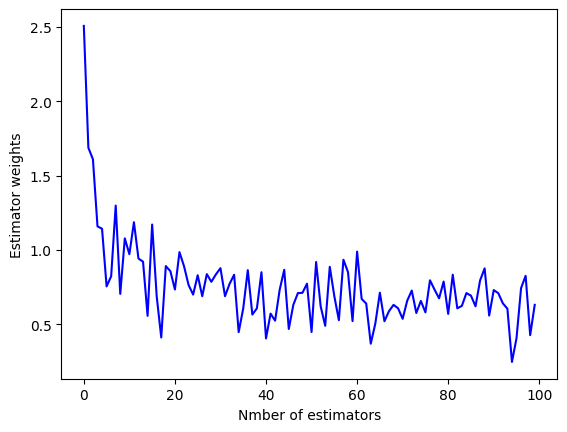

In [28]:
weak_learner = DecisionTreeClassifier(max_depth=1)
#By default: algorithm=SAMME.R : a variant that works with classifiers that can output prediction probabilities.
model_ada_tree = AdaBoostClassifier(estimator=weak_learner, n_estimators=100, algorithm="SAMME", learning_rate=1,random_state=42)

model_ada_tree.fit(x_train, y_train)
y_pred = model_ada_tree.predict(x_test)

print("Accuracy value:","%.3f" %(100*np.mean(y_test==y_pred)),"%")

wj=model_ada_tree.estimator_weights_
plt.plot(wj,'b-')
plt.xlabel('Nmber of estimators')
plt.ylabel('Estimator weights')
plt.show()

Accuracy = 97.076 %


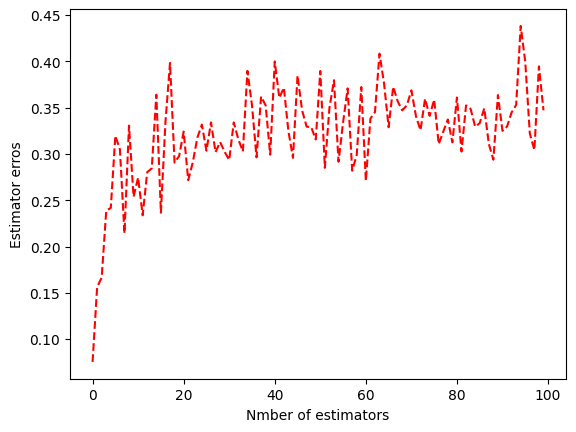

In [29]:
print('Accuracy =', round(np.mean(y_test==y_pred)*100,3),'%')

e=model_ada_tree.estimator_errors_
plt.plot(e,'r--')
plt.xlabel('Nmber of estimators')
plt.ylabel('Estimator erros')
plt.show()

## Travail d'analyse
- Interpréter les deux courbes obtenues.

## <font color='blue'> Etape 5. Sélection de variables

In [30]:
model_ada_tree.feature_importances_

array([0.        , 0.0781806 , 0.        , 0.01667616, 0.0234186 ,
       0.03512594, 0.00871048, 0.08438059, 0.03657537, 0.00593201,
       0.05412489, 0.        , 0.01423145, 0.04001285, 0.01780545,
       0.06964086, 0.        , 0.0343432 , 0.02063604, 0.03357593,
       0.        , 0.07685885, 0.01531672, 0.08520022, 0.05621567,
       0.        , 0.05987133, 0.07808744, 0.05507936, 0.        ])

In [33]:
imp = pd.DataFrame([model_ada_tree.feature_importances_], columns=cancer['feature_names'])

In [169]:
feature_imp

worst area                 0.085200
mean concave points        0.084381
mean texture               0.078181
worst concave points       0.078087
worst texture              0.076859
compactness error          0.069641
worst concavity            0.059871
worst smoothness           0.056216
worst symmetry             0.055079
radius error               0.054125
area error                 0.040013
mean symmetry              0.036575
mean compactness           0.035126
concave points error       0.034343
fractal dimension error    0.033576
mean smoothness            0.023419
symmetry error             0.020636
smoothness error           0.017805
mean area                  0.016676
worst perimeter            0.015317
perimeter error            0.014231
mean concavity             0.008710
mean fractal dimension     0.005932
worst compactness          0.000000
mean radius                0.000000
worst radius               0.000000
concavity error            0.000000
texture error              0

/var/folders/6d/m4g0vvg508z0xb6_c6h4qmfm0000gn/T/ipykernel_4557/125169153.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")


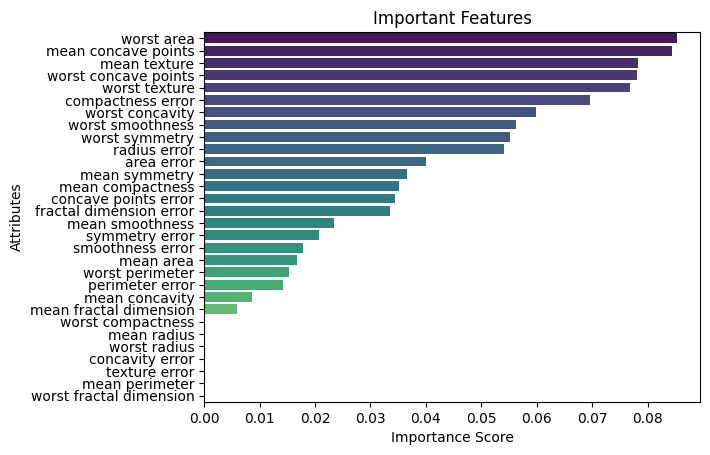

In [40]:
feature_imp = pd.Series(model_ada_tree.feature_importances_,index=cancer.feature_names).sort_values(ascending=False)
#feature_imp

# Create bar plot of feature importance score
sns.barplot(x=feature_imp, y=feature_imp.index, palette="viridis")

# Add labels to the graph
plt.xlabel('Importance Score')
plt.ylabel('Attributes')
plt.title("Important Features")
plt.show()

## Travail d'analyse
- Quelles sont les variables qui semblent pertinentes?

## Travail supplémentaire
- Appliquer Adaboost pour la classification sur la base "iris de fisher" avec un SVM linéaire comme weak learner.